## Maria Varga

# Convolutions and Node Activations

In [201]:
import numpy as np

## my_activation function

In [13]:
def my_activation(pre_activation_value, activation_type):
    '''
    Apply activation function
    
    Arguments:
    pre_activation_value -- a single float value representing an input to a neural network node
    activation_type -- a string variable which can take values “relu”, “sigmoid”, “tanh”, or “linear”.
    
    Returns:
    a single float after the activation function 
    
    '''
    
    if activation_type =='relu':
        return pre_activation_value * (pre_activation_value > 0)
    
    elif activation_type =='sigmoid':
        return  1 / (1 + np.exp(-pre_activation_value))
    
    elif activation_type =='tanh':
        return np.tanh(pre_activation_value)
    
    elif activation_type =='linear':
        return pre_activation_value
    
    else:
        print("Warning: activation_type: {} not valid".format(activation_type))
        
    

Testing function

In [212]:
pre_activation_value = 0.5
print('Relu: {}'.format(my_activation(pre_activation_value, activation_type = 'relu')))
print('Sigmoid: {}'.format(my_activation(pre_activation_value, activation_type = 'sigmoid')))
print('Tanh: {}'.format(my_activation(pre_activation_value, activation_type = 'tanh')))
print('Linear: {}'.format(my_activation(pre_activation_value, activation_type = 'linear')))

Relu: 0.5
Sigmoid: 0.622459331202
Tanh: 0.46211715726
Linear: 0.5


## convolve_filter function

In this function I assumed the input will be an RGB image, so I made the necessary alteration on the shapes.

In [213]:
def convolve_filter(input_image, filters, stride = 1, padding = 2):
    '''
    
    Convolve image with filter
    
    Argument:
    input_image -- an NxMX3 numpy array of float values representing an image
    filters -- a 3x3x3 numpy array of float values representing a convolutional filter
    stride -- an integer value indicating the desired stride for the convolution
    padding -- an integer value indicating the depth of padding for the convolution
    
    Returns:
    output_image -- the resulted convolved image of size N_outXM_out
    
    '''
    #filter size
    f = filters.shape[0]
    
    # Compute the dimensions of the CONV output 
    N_out = int((input_image.shape[0] - f + 2*padding)/stride) + 1
    M_out = int((input_image.shape[1] - f + 2*padding)/stride) + 1
    
    # Output volume
    output_image = np.zeros((N_out, M_out))    

    # Padding the image
    input_image_pad = np.pad(input_image, ((padding, padding), (padding, padding), (0, 0)), 'constant', constant_values=0)
    
    for h in range(N_out):    # loop over vertical axis of the output volume
        for w in range(M_out): # loop over horizontal axis of the output volume
             
            # Find the corners of the current "slice" 
            vert_start = h * stride
            vert_end = vert_start + f
            horiz_start = w * stride
            horiz_end = horiz_start + f
            # Use the corners to define the (3D) slice 
            image_slice = input_image_pad[vert_start:vert_end, horiz_start:horiz_end, :]
            # Convolve the (3D) slice with the filter 
            conv = np.sum(np.multiply(image_slice,filters))
            # Apply activation
            conv = my_activation(conv, 'relu')           
            output_image[h, w] = conv
    
    return output_image      

Testing function

In [215]:
input_image = np.random.randn(4, 4, 3)
filters = np.random.randn(3, 3, 3)

In [216]:
output_image = convolve_filter(input_image, filters, stride = 1, padding = 2)

In [217]:
output_image.shape

(6, 6)

# Regression Analysis

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

### Loading database

In [219]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()
X = boston['data']
y = boston['target']
feature_names = boston['feature_names']

In [220]:
X.shape, y.shape

((506, 13), (506,))

In [221]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='|S7')

### Data description

In [222]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Initial data exploration

In [223]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

In [224]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [225]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [226]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,5)})

We can look at the correlation graph below to identify what are the variable that influence price the most.

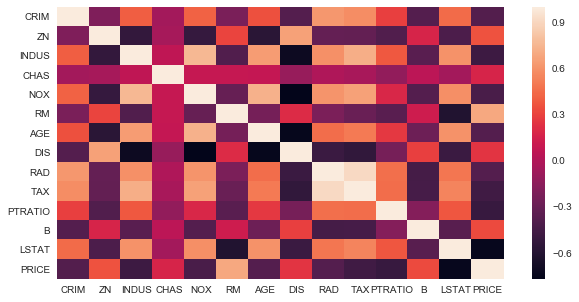

In [227]:
corr = bos.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

As we realize, LSTAT seems to have the strongest negative impact on price, followed by PTRATIO, TAX and INDUS.
On the other hand, RM has the most positive impact on the PRICE.

This can be confirmed looking at the scatterplots below.

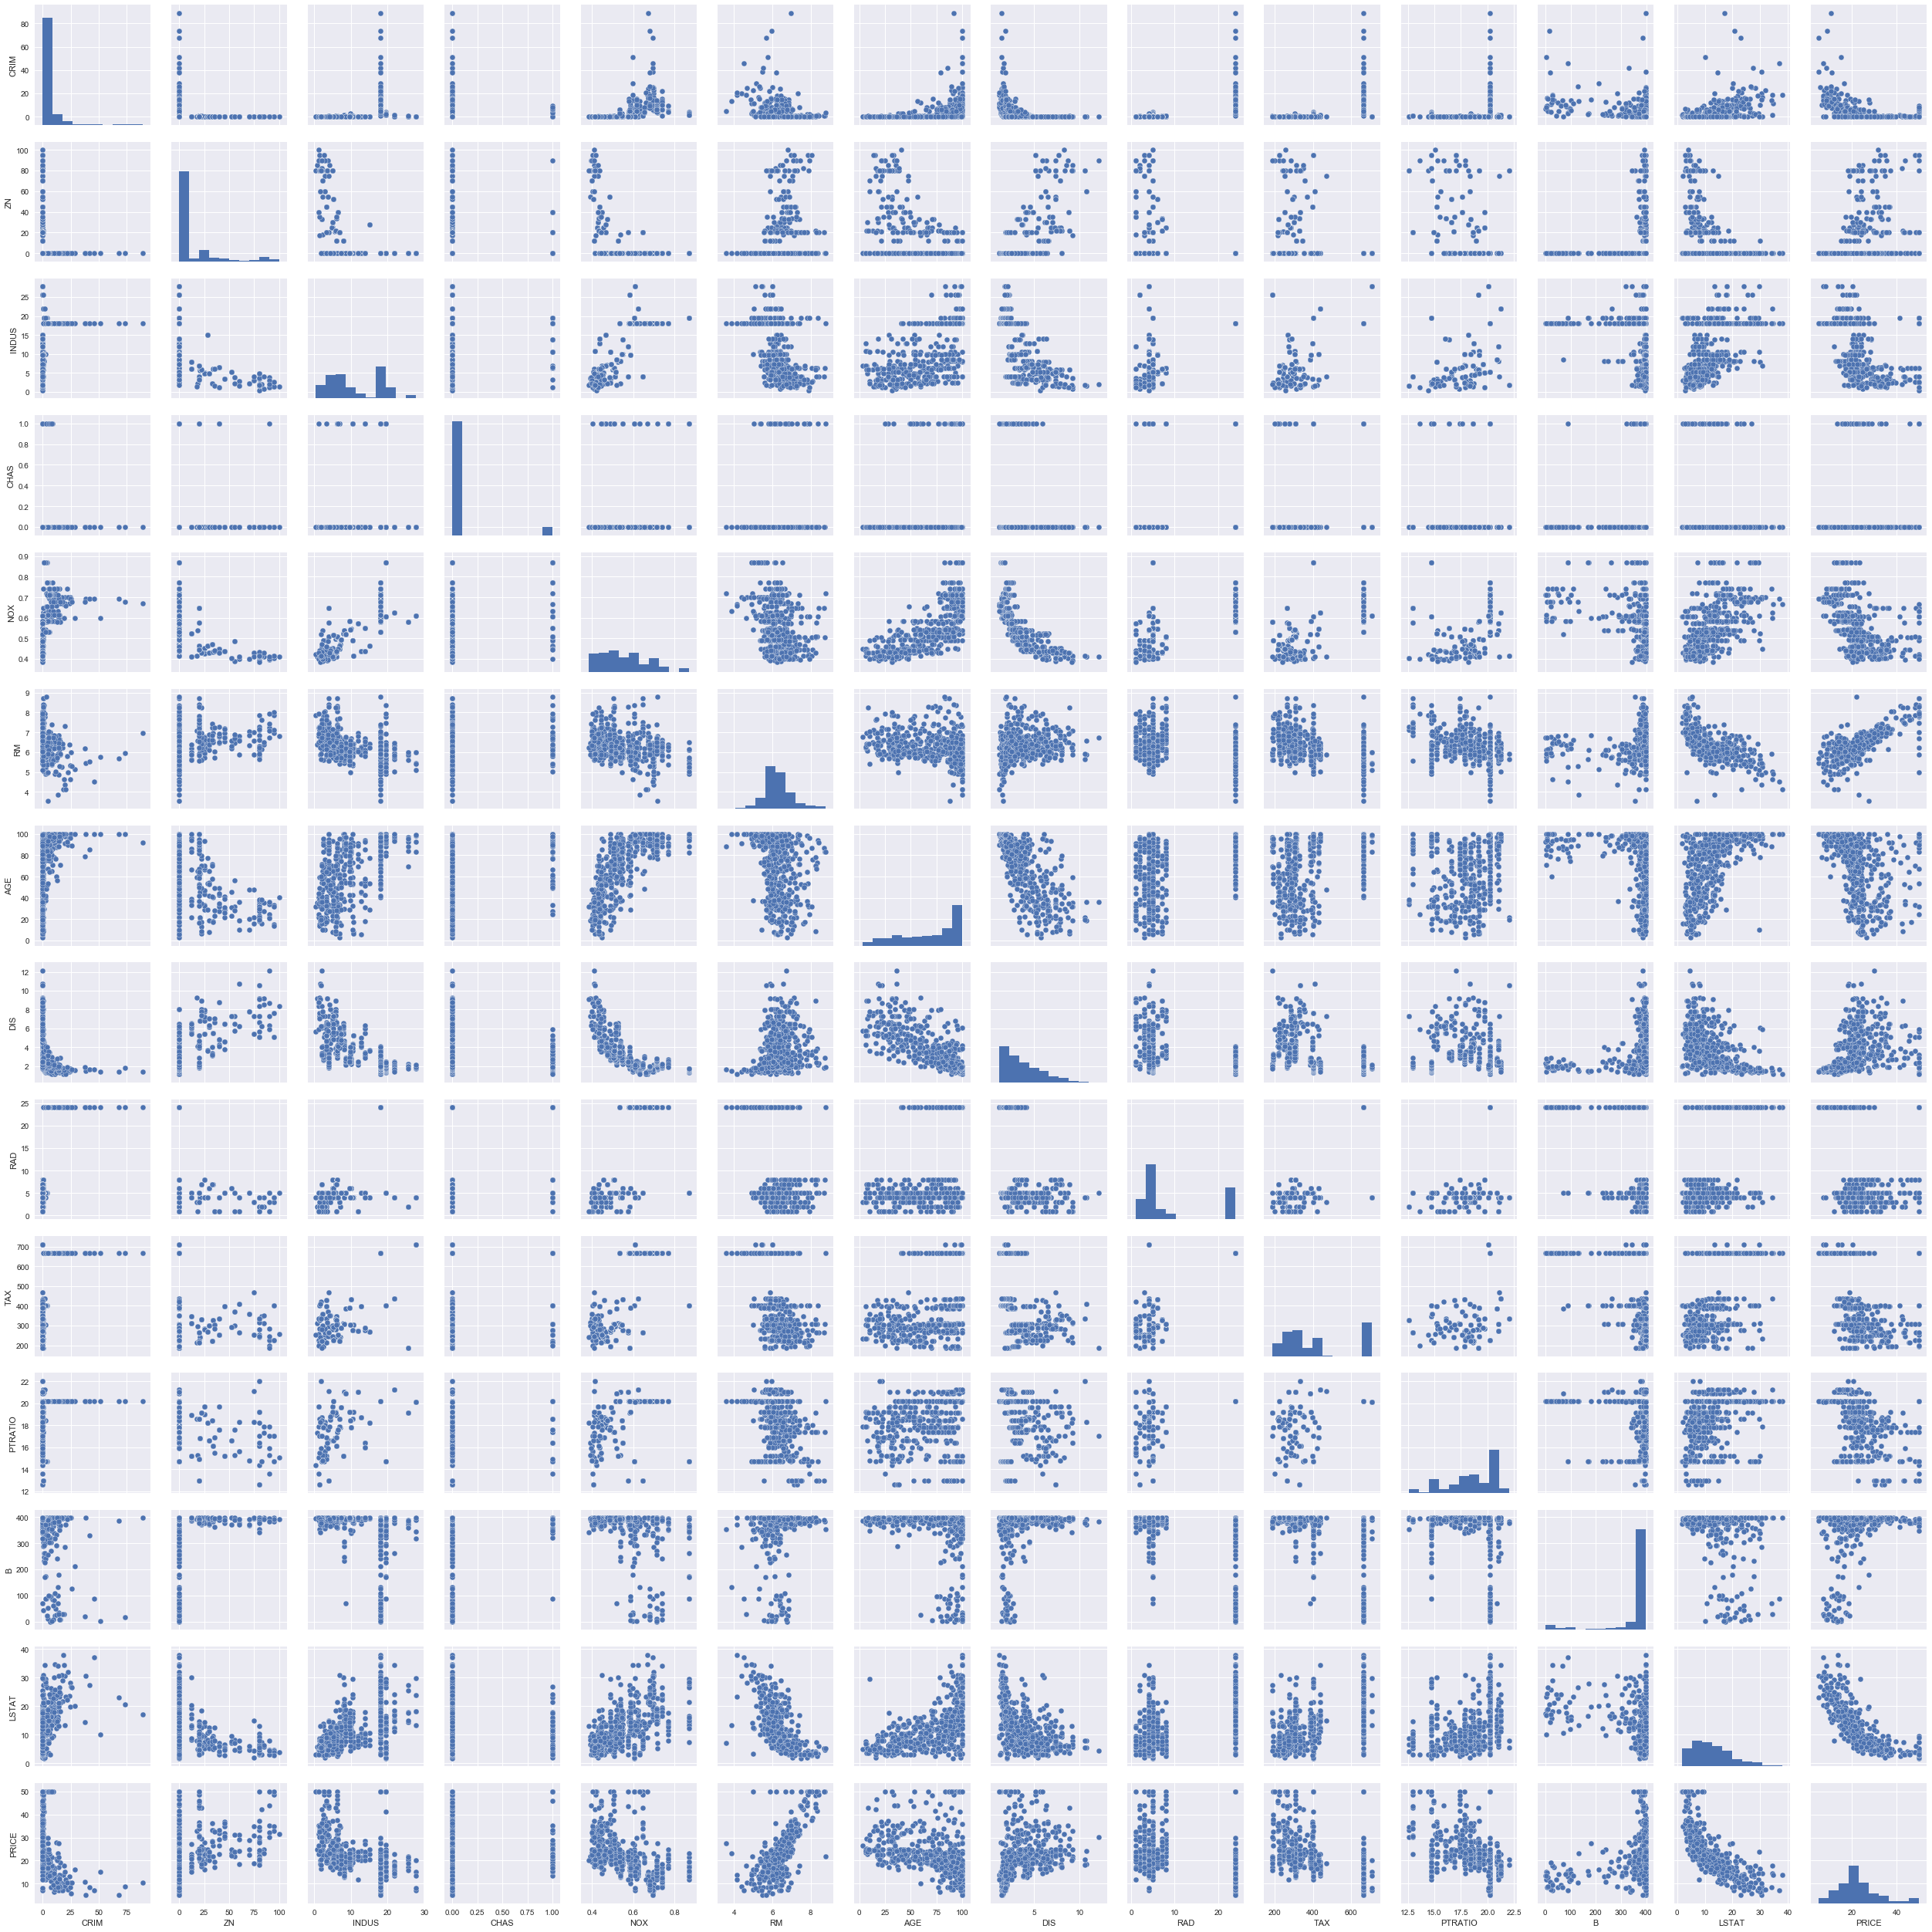

In [141]:
sns.pairplot(bos)

The graph below shows the amplified graph of LSTAT vs PRICE to confirm the relationship 

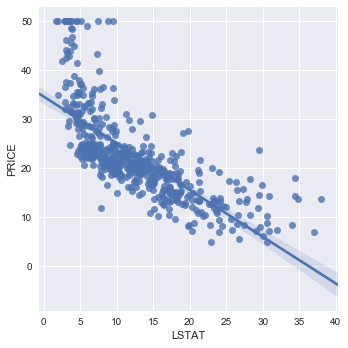

In [228]:
#sns.set_context("poster", font_scale=0.85)
sns.lmplot(x='LSTAT', y='PRICE', data=bos)

### Simple ML pipeline

Split data set into train/test set

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Run Linear Regression Model

In [230]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Evaluate model

In [231]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [232]:
print('Test set MSE: {}').format(mean_squared_error(y_test,pred_test))
print('Train set MSE: {}').format(mean_squared_error(y_train,pred_train))

Test set MSE: 20.7471433603
Train set MSE: 22.9834937317


We can try ou removing some of the variables that has low correlation with the response variable to see if it affects the model performance.

The model is definetely not overfitting, so we could try more complex model ( as Neural Networks) in order to improve the results.


### Saving model

In [233]:
import pickle

To save our trained model:

In [234]:
filename = 'model.sav'
pickle.dump(lm, open(filename, 'wb'))

To load model in the future:

In [235]:
loaded_model = pickle.load(open(filename, 'rb'))

# Data Preparation

In [255]:
import datetime as dt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [275]:
datatraining = pd.read_csv("occupancy_data/datatraining.txt")
datatest = pd.read_csv("occupancy_data/datatest.txt")
datatest2 = pd.read_csv("occupancy_data/datatest2.txt")

In [276]:
datatraining.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [277]:
for var in datatraining.columns:
    print("{} : {} ".format(var, datatraining[var].dtype))

date : object 
Temperature : float64 
Humidity : float64 
Light : float64 
CO2 : float64 
HumidityRatio : float64 
Occupancy : int64 


The variable "date" is the only variable type that is not accepted in supervised learning algorithms. However, we can extract usefull variables from the information containing on it..

In [278]:
def read_data(data_path):
    
    data = pd.read_csv(data_path)

    data["date"] = pd.to_datetime(data["date"])
    data["year"] = data["date"].dt.year
    data["month"] = data["date"].dt.month
    data["day"] = data["date"].dt.day
    data["hour"] = data["date"].dt.hour
    data["minute"] = data["date"].dt.minute
    data["second"] = data["date"].dt.second
    data['weekday'] = data[['date']].apply(lambda x: dt.datetime.strftime(x['date'], '%A'), axis=1)
    data.drop('date',axis=1, inplace=True)
    
    return data

In [329]:
datatraining = read_data("occupancy_data/datatraining.txt")
datatest = read_data("occupancy_data/datatest.txt")
datatest2 = read_data("occupancy_data/datatest2.txt")

In [330]:
datatraining.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,year,month,day,hour,minute,second,weekday
1,23.18,27.2720,426.0,721.25,0.004793,1,2015,2,4,17,51,0,Wednesday
2,23.15,27.2675,429.5,714.00,0.004783,1,2015,2,4,17,51,59,Wednesday
3,23.15,27.2450,426.0,713.50,0.004779,1,2015,2,4,17,53,0,Wednesday
4,23.15,27.2000,426.0,708.25,0.004772,1,2015,2,4,17,54,0,Wednesday
5,23.10,27.2000,426.0,704.50,0.004757,1,2015,2,4,17,55,0,Wednesday


We can funther one hot encode the weekday

In [331]:
def weekday_onehot(datatraining): 
    
    week = list(set(datatraining['weekday']))
    le = LabelEncoder()
    le.fit(datatraining['weekday'])
    datatraining['Label'] = le.transform(datatraining['weekday'])
    onehot_encoder = OneHotEncoder(sparse=False)
    y_r = np.array(datatraining['Label']).reshape(-1,1)
    y_onehot = onehot_encoder.fit_transform(y_r)
    
    for day,i in zip(week,range(7)):
        datatraining[day] = y_onehot[:,i]
    
    datatraining.drop('weekday',axis=1, inplace=True)
    datatraining.drop('Label',axis=1, inplace=True)
    
    
    return datatraining
    

In [332]:
datatraining = weekday_onehot(datatraining)
datatest = weekday_onehot(datatest)
datatest2 = weekday_onehot(datatest2)

In [333]:
datatraining.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,year,month,day,hour,minute,second,Monday,Tuesday,Friday,Wednesday,Thursday,Sunday,Saturday
1,23.18,27.2720,426.0,721.25,0.004793,1,2015,2,4,17,51,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,23.15,27.2675,429.5,714.00,0.004783,1,2015,2,4,17,51,59,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,23.15,27.2450,426.0,713.50,0.004779,1,2015,2,4,17,53,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,23.15,27.2000,426.0,708.25,0.004772,1,2015,2,4,17,54,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,23.10,27.2000,426.0,704.50,0.004757,1,2015,2,4,17,55,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
